In [1]:
import numpy as np
from scipy.integrate import odeint
import pandas as pd
import warnings
pd.set_option('display.float_format', '{:0.8f}'.format)
import matplotlib.pyplot as plt

In [12]:
def noise_percentage_to_snr_db(noise_percentage):
    """
    Convert noise percentage to signal-to-noise ratio in decibels (dB).

    Parameters:
    noise_percentage (float): Noise level in percentage (0 to 100).

    Returns:
    float: SNR in dB.
    """
    if noise_percentage < 0 or noise_percentage > 100:
        raise ValueError("Noise percentage must be between 0 and 100.")
    
    # Calculate signal power (as a fraction of total power)
    signal_percentage = 100 - noise_percentage
    
    # Convert percentages to power ratios
    signal_power = signal_percentage / 100
    noise_power = noise_percentage / 100
    
    # Calculate SNR in dB
    snr_db = 10 * np.log10(signal_power / noise_power)
    
    return snr_db

In [17]:
np.ceil(noise_percentage_to_snr_db(0.01))

40.0

In [3]:
result_df_up = pd.read_excel("pendulum_dat.xlsx", sheet_name="pend_df")

In [8]:
result_df = result_df_up.fillna(method="ffill")

/var/folders/vm/q63p6h6d0j70_r0d8tpfx9gc0000gn/T/ipykernel_3245/3115443148.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  result_df = result_df_up.fillna(method="ffill")


## 2 vs 3

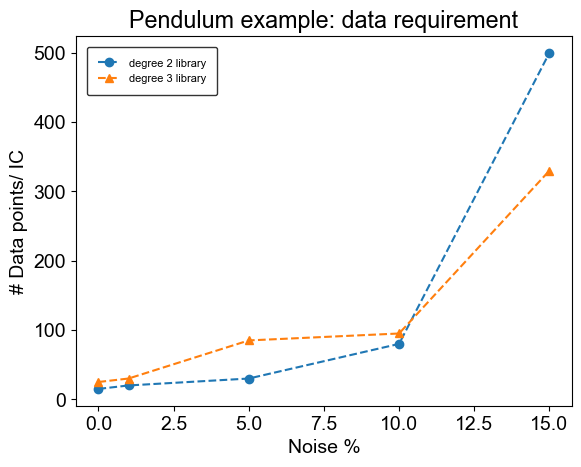

In [37]:
# poly_degrees = [2, 3, 4]
# marker_list = ["o", "^", "D"]

poly_degrees = [2, 3]
marker_list = ["o", "^"]
for degree, marker in zip(poly_degrees, marker_list):
    df_ = result_df[result_df["Degree of Polynomials"]==degree]
    plt.plot(df_["Noise %"]*100, df_["# Data points/ IC"],
             label = "degree {} library".format(degree), marker=marker, linestyle="--")


plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 14
# Set labels for X and Y axes
plt.xlabel('Noise %')
plt.ylabel('# Data points/ IC')
# plt.xticks([1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

plt.legend(
    # loc='lower right',
    prop={'size': 8},
    frameon=True,  # Ensure the legend box is visible
    borderpad=1,  # Padding between the border and the legend content
    borderaxespad=1,  # Padding between the legend and the axes
    fancybox=True,  # Rounded border corners (set to False for square corners)
    edgecolor='black'
)
plt.title("Pendulum example: data requirement")

plt.savefig('Example_3_pendulum_2_vs_3.svg',
            format='svg', bbox_inches='tight')

## 3 vs 4

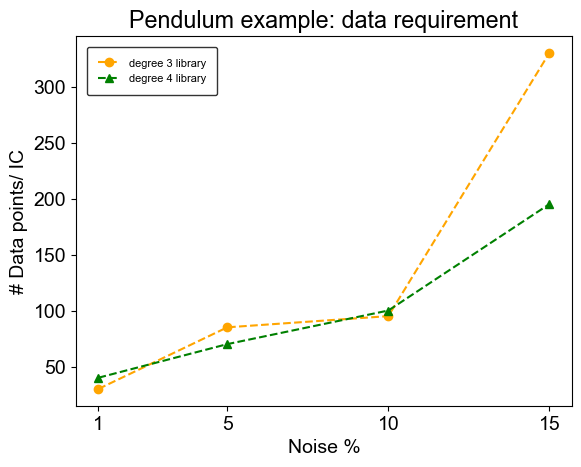

In [43]:
# poly_degrees = [2, 3, 4]
# marker_list = ["o", "^", "D"]

poly_degrees = [3, 4]
marker_list = ["o", "^"]
color_list = ["orange", "green"]
for degree, marker, color in zip(poly_degrees, marker_list, color_list):
    df_ = result_df[result_df["Degree of Polynomials"]==degree]
    plt.plot(df_["Noise %"][1:]*100, df_["# Data points/ IC"][1:],
             label = "degree {} library".format(degree),
             color = color, marker=marker, linestyle="--")


plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 14
# Set labels for X and Y axes
plt.xlabel('Noise %')
plt.ylabel('# Data points/ IC')
plt.xticks([1, 5, 10, 15])

plt.legend(
    # loc='lower right',
    prop={'size': 8},
    frameon=True,  # Ensure the legend box is visible
    borderpad=1,  # Padding between the border and the legend content
    borderaxespad=1,  # Padding between the legend and the axes
    fancybox=True,  # Rounded border corners (set to False for square corners)
    edgecolor='black'
)
plt.title("Pendulum example: data requirement")

plt.savefig('Example_3_pendulum_3_vs_4.svg',
            format='svg', bbox_inches='tight')

In [ ]:
import numpy as np
from scipy.integrate import odeint
import pandas as pd
import warnings
pd.set_option('display.float_format', '{:0.8f}'.format)
import matplotlib.pyplot as plt

folder_names = {"case39bus9gen_halfperturb", "case39bus10gen_onetenthperturb"}


#Loading data frames
num_permutations = 4
folder_name_1 = "case39bus9gen_halfperturb"
# folder_name_1 = "case39bus10gen_onetenthperturb"
noise_percent_list = [0, 0.0001, 0.001, 0.01]
snr_list = ["No noise", "40dB", "30dB", "20dB"]
result_dict_up = {}
for noise_perc_value, snr in zip(noise_percent_list, snr_list):
    result_dict_up[snr] = pd.read_csv(
        "/Users/manu_jay/git_repos/DAE-FINDER_dev/Numerical_Exa"
        "mple/power_grid/{}/{}-{}_noise_{}_permutation.csv".format(folder_name_1, folder_name_1, noise_perc_value,
                                                                   num_permutations))

#Plotting each of the dataframes
total_relations = 49
from matplotlib import pyplot as plt

for snr, result_df_ in result_dict_up.items():
    # plt.plot(result_df_["#Perturbations"],
    #          (total_relations-result_df_["#Incorrect relationship"])*100/total_relations, '.-', label = snr)
    line_fmt = '-o' if folder_name_1 == "case39bus10gen_onetenthperturb" else '--^'

    gen_full_recovery_pert = result_df_[result_df_["#Incorrect gen relationship mean"] == 0]["#Perturbations"].iloc[0]
    gen_full_recovery_incorr = (total_relations - result_df_[result_df_["#Incorrect gen relationship mean"] == 0][
        "#Incorrect relationship mean"].iloc[0]) * 100 / total_relations
    # print(gen_full_recovery_pert, gen_full_recovery_incorr)

    # plt.errorbar(result_df_["#Perturbations"],
    #              (total_relations - result_df_["#Incorrect relationship mean"]) * 100 / total_relations,
    #               (result_df_["#Incorrect relationship std"]) * 100 / total_relations,
    #              fmt=line_fmt, label=snr, capsize=5)
    line, _, _ = plt.errorbar(result_df_["#Perturbations"],
                              (total_relations - result_df_["#Incorrect relationship mean"]) * 100 / total_relations,
                              (result_df_["#Incorrect relationship std"]) * 100 / total_relations,
                              fmt=line_fmt, label=snr, capsize=5)
    label_ = '100% Generator Recovery' if snr == "30dB" else ""
    plt.plot([gen_full_recovery_pert], [gen_full_recovery_incorr], marker='o',
             markersize=15, linestyle='', markerfacecolor='none', label=label_,
             color='black')  # Square markers, no line

    # plt.errorbar(x, y_mean, yerr=y_std, fmt='-o', label='Mean with Std Error', capsize=5)
    # plt.axhline(y=10, color='r', linestyle='--', linewidth=1, label='Reference Line')
    # plt.xticks(range(1, len(sing_vals_1)+1, 1))
    # plt.ylim(np.log(sing_vals_1)[-1]-1, np.log(sing_vals_1)[0]+1)

plt.axhline(y=80, color='r', linestyle='--', linewidth=1, label='80% Recovery')

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 14
# Set labels for X and Y axes
plt.xlabel('Number of Perturbations')
plt.ylabel('% of Algebraic Relationships correctly identified')
plt.xticks([1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

plt.legend(
    # loc='lower right',
    prop={'size': 8},
    frameon=True,  # Ensure the legend box is visible
    borderpad=1,  # Padding between the border and the legend content
    borderaxespad=1,  # Padding between the legend and the axes
    fancybox=True,  # Rounded border corners (set to False for square corners)
    edgecolor='black'
)
if folder_name_1 == "case39bus10gen_onetenthperturb":
    plt.title("Small perturbations")
elif folder_name_1 == "case39bus9gen_halfperturb":
    plt.title("Large perturbations")
# plt.legend()

plt.savefig('/Users/manu_jay/git_repos/DAE-FINDER_dev/Numerical_Example/power_grid/{}.svg'.format(folder_name_1),
            format='svg', bbox_inches='tight')


